# 面向计算机视觉中的PCA全家桶

## 第一部分：PCA理论

主成分分析，或者称为PCA，是⼀种被⼴泛使⽤的技术，应⽤的领域包括维度降低、有损数
据压缩、特征抽取、数据可视化（Jolliffe, 2002）

PCA的数学定义是：一个正交化线性变换，把数据变换到一个新的坐标系统中，使得这一数据的任何投影的第一大方差在第一个坐标（称为第一主成分）上，第二大方差在第二个坐标（第二主成分）上，依次类推。

以二维空间的数据降维到一维空间为例

PCA可以被定义为数据在低维线性
空间上的正交投影，这个线性空间被称为主⼦空间（principal subspace），使得投影数据的⽅差
被最⼤化（Hotelling, 1933）。等价地，它也可以被定义为使得平均投影代价最⼩的线性投影。
平均投影代价是指数据点和它们的投影之间的平均平⽅距离（Pearson, 1901）。

![title](images/1.png)

图 1: 主成分分析寻找⼀个低维空间，被称为主⼦平⾯，⽤紫⾊的线表⽰，使得数据点（红点）在⼦空
间上的正交投影能够最⼤化投影点（绿点）的⽅差。PCA的另⼀个定义基于的是投影误差的平⽅和的最
⼩值，⽤蓝线表⽰。

### 最大方差形式

设想一下对二维数据进行降维，我们需要做的就是将二维数据投射到一个方向上，使得平均投影代价最小。下面两个方向（大红色与紫红色）的选择，哪一种符合要求？

<img src="images/2.png" width="40%">

考虑⼀组观测数据集$x_n$，其中$n = 1, . . . , N$，因此$x_n$是⼀个D维欧⼏⾥得空间中的变量。我们的⽬标是将数据投影到维度$M < D$的空间中，同时最⼤化投影数据的⽅差。⾸先，考虑在⼀维空间$(M=1)$上的投影。我们可以使⽤D维向量$u_1$定义这个空间的⽅向。为了⽅便（并且不失⼀般性），我们假定选择⼀个单位向量，从⽽$u^T_1 u_1 = 1$（注意，我们只对$u_1$的⽅向感兴趣，⽽对$u_1$本⾝的⼤⼩不感兴趣）。这样，每个数据点$x_n$被投影到⼀个标量值$u^T_1 u_1 = 1$上。投影数据的均值是$u^T_1 \bar{x}$，其中，$\bar{x}$是样本集合的均值，形式为

$$\bar{x} = \frac{1}{N} \sum^N_{n=1} x_n$$

投影数据的⽅差为

$$\frac{1}{N} \sum^N_{n-1} { (u^T_1 x_n - u^T_1 \bar{x}) }^2= u^T_1 S u_1$$

其中$S$是数据的协⽅差矩阵，定义为

$$S = \frac{1}{N}\sum^N_{n=1}(x_n - \bar{x})(x_n - \bar{x})^T$$

为了将方差最大化，并且使得$u^T_1$满足$u^T_1 u_1 =1$，引入拉格朗日乘数，记作$\lambda_1$，有下式：

$$u^T_1 S u_1 + \lambda_1(1-u^T_1 u_1)$$

通过令它关于$u_1$的导数等于零，我们看到驻点满⾜

$$S u_1 = \lambda_1 u_1$$

这表明$u_1$一定是$S$的一个特征向量。如果我们左乘$u_1^T$，利用$u^T_1 u_1 =1$， 我们得到：

$$u^T_1 S u_1 = \lambda_1$$

因此当我们将$u_1$设置为与具有最⼤的特征值$\lambda_1$的特征向量相等时，⽅差会达到最⼤值。这个特征向量被称为第⼀主成分。

对于高维的数据，我们按照上面的方法，去除掉第一主成分后，用同样的方法得到第二主成分。

##### 注意：

1. 通常，为了确保第一主成分描述的是最大方差的方向，我们会使用平均减法进行主成分分析。如果不执行平均减法，第一主成分有可能或多或少的对应于数据的平均值。另外，为了找到近似数据的最小均方误差，我们必须选取一个零均值。
2. PCA对变量的缩放很敏感。
3. 对高维数据，PCA需要很高的计算要求。
4. 每一个特征值都与跟它们相关的方差是成正比的，而且所有特征值的总和等于所有点到它们的多维空间平均点距离的平方和。

In [1]:
import os
import cv2
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
%matplotlib inline

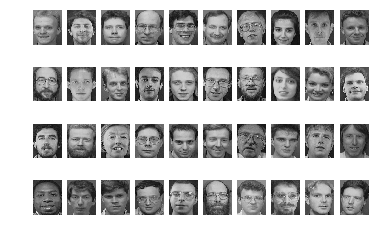

In [2]:
num_class = 40
num_in_class = 10
img_w = 92
img_h = 112
show_num = 0
images_path = './data/att_faces'
imgs_dir = os.listdir(images_path)
faces = list()
labels = list()
label_num = 0
for list_dir in imgs_dir:
    imgs = list()
    temp_path = images_path + '/' + list_dir
    if os.path.isdir(temp_path):
        label_num = label_num + 1
        imgs_list = os.listdir(temp_path)
        for img_name in imgs_list:
            img_path = temp_path + '/' + img_name
            img = cv2.imread(img_path)
            if img_name == '1.pgm':
                show_num = show_num + 1
                plt.subplot(4,10,show_num)
                plt.axis('off')
                plt.imshow(img)
            imgs.append(img)
            labels.append(label_num)
    faces.append(imgs)
plt.show()

In [31]:
X = np.zeros((num_in_class*num_class, img_w*img_h))
num = 0
for face in faces:
    for img in face:
        X[num, :] = img[:,:,0].flatten()
        num = num + 1
face_labels = np.array(labels)

一般而言，图像的矩阵表示维度很高，而PCA是传统图像降维中的常用方法。

在写PCA代码之前，我们需要先讨论一下**样本矩阵**和对应的**方差矩阵**，这里涉及到一些细节问题。

值得注意的是，图像具有典型的二维空间结构。在PCA使用初期，是将图像拉伸成一个行向量，然后按列排布成一个样本矩阵。如下所示

<img src="images/3.png" width="30%">

$\phi_0,\phi_1,,,\phi_{M-1}$表示同一个样本的多个特征。
$x_1,x_2,,,x_N$表示$N$个样本。

协方差矩阵$\sum = \Phi^T * \Phi$

<font size=0.5> 

$$=\begin{bmatrix}
 \mathrm{E}[(X_1 - \mu_1)(X_1 - \mu_1)] & \mathrm{E}[(X_1 - \mu_1)(X_2 - \mu_2)] & \cdots & \mathrm{E}[(X_1 - \mu_1)(X_n - \mu_n)] \\ \\
 \mathrm{E}[(X_2 - \mu_2)(X_1 - \mu_1)] & \mathrm{E}[(X_2 - \mu_2)(X_2 - \mu_2)] & \cdots & \mathrm{E}[(X_2 - \mu_2)(X_n - \mu_n)] \\ \\
 \vdots & \vdots & \ddots & \vdots \\ \\
 \mathrm{E}[(X_n - \mu_n)(X_1 - \mu_1)] & \mathrm{E}[(X_n - \mu_n)(X_2 - \mu_2)] & \cdots & \mathrm{E}[(X_n - \mu_n)(X_n - \mu_n)]
\end{bmatrix}$$

可以看出$\sum$是一个实对称矩阵($\sum = \sum^T$)，
   满足性质： n阶实对称矩阵必可对角化。

$\sum$可以进行SVD分解$\sum = U \Lambda U^T$，其中$U$是正交矩阵

直接使用numpy.linalg.svd()函数，便可以对方差矩阵进行SVD分解，此时返回的特征值按照大小绛序排列好。

1. 当 样本数量 N >= 特征维数 M 时，随意取出特征向量前 K 列，即可达到PCA的要求。
2. 当 样本数量 N < 特征维数 M 时，提取的特征向量数量 K 不能超过 M，否则是无意义的。

In [4]:
def norm_img(gray):
    g_max = np.max(gray)
    g_min = np.min(gray)
    gray = (gray - g_min) / (g_max - g_min) * 255
    return gray.astype('uint8')

In [5]:
def show_result(X):
    show_num = 0
    for i in range(X.shape[0]):
        if i % 10 == 0:
            img = X[i,:,:]
            show_num = show_num + 1
            plt.subplot(4,10,show_num)
            plt.axis('off')
            plt.imshow(norm_img(img), cmap ='gray')
    plt.show()
    return

In [6]:
def PCA(X):
    X_mean = np.mean(X, 0)
    X_std = np.std(X, 0)
    X = (X - X_mean)#/X_std
    #cov_X = X^T * X / X.shape[0]
    cov_X = np.cov(X, rowvar=0)
    U,_,_ = np.linalg.svd(cov_X)
    return U

In [7]:
start = dt.datetime.now()
U = PCA(X)
end = dt.datetime.now()
print "PCA time:", (end - start)

PCA time: 0:08:19.265142


In [14]:
def reconstruct(X, U, k):
    Z = np.dot(X, U[:, 0:k])
    X_pca = np.dot(Z, U[:, 0:k].T)
    return X_pca

In [15]:
k = 15

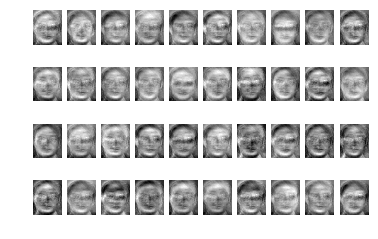

In [16]:
X_pca = reconstruct(X, U, k)
X_pca = X_pca.reshape(-1, img_h, img_w)
show_result(X_pca)

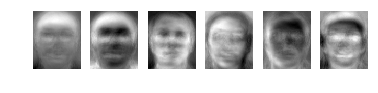

In [19]:
show_num = 0
for i in range(6):
    img = U[:,i].reshape(img_h,img_w)
    show_num = show_num + 1
    plt.subplot(1,6,show_num)
    plt.axis('off')
    plt.imshow(img, cmap ='gray')
plt.show()

在上面构建样本矩阵的过程中，是将一张图像展平为向量作为一行。假设图像的行数为$n$，列数为$n$，那么协方差矩阵的大小为$nm * nm$。这样做显然是一方面破坏了样本的二维结构，另一方面导致了巨大的计算量。为了解决这些问题，人们提出了二维PCA。

### 2DPCA

我们设数据矩阵为$A$，映射向量为$X$，映射后的矩阵为$Y$，我们如何确定一个好的映射向量$X$，使得映射后的矩阵$Y$的方差最大？

$$J(X) = tr(S_x)$$

$$S_x = E(Y - E(Y))(Y - E(Y)^T) = E[AX - E(AX)][AX - E(AX)]^T = E[(A -E(A))X][(A - E(A))X]^T$$

$$tr(S_x) = X^TE[(A - E(A))^T (A - E(A))]X$$

令$G_t$为数据$A$的方差矩阵

$$G_T = E[(A - E(A))^T (A - E(A))]$$

计算方法为：$$G_T = \frac{1}{N} \sum^N_{j=1} (A_j - \bar{A})^T(A_j - \bar{A})$$

那么： $$J(X) = X^T G_T X$$

欲使上面的方差$X^TG_TX$最大，那么由最开始处的证明可知，$X$需要取$G_T$的最大特征值对应的特征向量。

该方法是基于矩阵形式的推导，不需要将图像展平为向量形式，不会破坏图像的结构。

In [32]:
def twoD_PCA(X):
    X_mean = np.mean(X,0)
    X = X - X_mean
    G_t = np.zeros((X.shape[2], X.shape[2]))
    for i in range(X.shape[0]):
        A = X[i,:,:]
        G_t = G_t + np.dot(A.T, A)
    G_t = G_t / X.shape[0]
    U,_,_ = np.linalg.svd(G_t)
    return U

In [33]:
X = X.reshape(-1, img_h, img_w)
start = dt.datetime.now()
U = twoD_PCA(X)
end = dt.datetime.now()
print "2D PCA time:", end - start

2D PCA time: 0:00:00.052070


可以看出这种方法使得方差矩阵与图片大小一致，在速度上也更有优势。

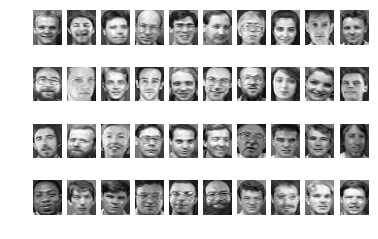

In [34]:
X_2Dpca = reconstruct(X, U, k)
show_result(X_2Dpca)

实际上，上面的推导过程中，$G_T$的计算方法是不严谨的，我们假设$A_j$是任意一张图片，为了方便可视化说明，令$A_j$大小为$2*4$，而$A^{'} = A_j - \bar{A}$，那么$A^{'}$大小也为$2*4$，$A^{'T} A^{'}=$

<img src="images/4.png" width="30%">

我们以上图中左边矩阵中，左上角第一个像素点为例，它只和右边矩阵中红色那两个像素点相乘了。也就是说，$(A_j - \bar{A})^T(A_j - \bar{A})$只是求了行（列）方差，并没有求出全图方差。

### Two-directional two-dimensional PCA

针对这一问题，人们就提出了双向二维PCA。

$$G_T = \frac{1}{N} \sum^N_{j=1} (A_j - \bar{A})^T(A_j - \bar{A})$$

$$G_Q = \frac{1}{N} \sum^N_{j=1} (A_j - \bar{A})(A_j - \bar{A})^T$$

$G_T，G_Q$求得的特征映射矩阵分别为$Z，X$

降维映射结果：$$Y = Z^TAX$$

图片重建结果： $$\hat{A} = ZYX^T$$

In [35]:
def twoDtwoD_PCA(X):
    X_mean = np.mean(X,0)
    X = X - X_mean
    G_q = np.zeros((X.shape[1], X.shape[1]))
    G_t = np.zeros((X.shape[2], X.shape[2]))
    for i in range(X.shape[0]):
        A = X[i,:,:]
        G_q = G_q + np.dot(A, A.T)
        G_t = G_t + np.dot(A.T, A)
    G_q = G_q / X.shape[0]
    G_t = G_t / X.shape[0]
    Z,_,_ = np.linalg.svd(G_q)
    U,_,_ = np.linalg.svd(G_t)
    return Z, U

In [36]:
def reconstruct_2D(A, U, Z, k):
    Y = np.dot(Z[:,0:k].T ,np.dot(A, U[:,0:k]))
    A_ = np.dot(Z[:,0:k], np.dot(Y, U[:,0:k].T))
    return A_

In [37]:
X = X.reshape(-1, img_h, img_w)
start = dt.datetime.now()
Z, U = twoDtwoD_PCA(X)
end = dt.datetime.now()
print "Two-directional two-dimensional PCA time:", end - start

Two-directional two-dimensional PCA time: 0:00:00.076733


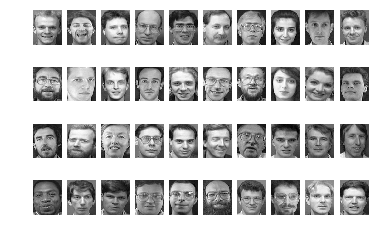

In [38]:
X_2D2Dpca = np.zeros(X.shape)
for i in range(X.shape[0]):
    X_2D2Dpca[i,:,:] = reconstruct_2D(X[i,:,:], U, Z, 50)
show_result(X_2D2Dpca)

总结一下，可以看出上面三种方案的区别：
1. PCA是将所有信号都展成一维进行处理，处理完成之后再恢复成高维。
2. 2D PCA 提出的算法在信号的原始维度上面进行处理，但只是压缩了一个维度。
3. 2D 2D PCA 也是在信号的原始维度上面进行处理，并且压缩了两个维度。

基于PCA的这一类算法，是属于数据的无监督处理算法，优化目标是使映射后的数据方差最大。

将PCA用于图像分类时，需要记住PCA是基于一个假设： **对分类有用的信息位于降维所选择的维度上**

**当没有任何假设的信息模型时，PCA很有可能丢掉极为重要的信号**

### 一些有趣的小试验

如果我们在一个非常简单的数据集（例如手写数字）上面求得降维矩阵，然后用于其他的自然图片时，会发生什么现象呢？能降维和重建吗？

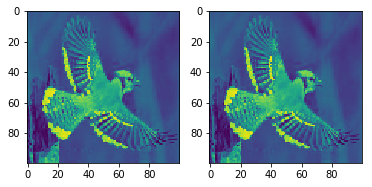

In [28]:
X = np.loadtxt("data/mnist2500_X.txt");
T = np.zeros((2500,100,100))
for i in range(X.shape[0]):
    img = X[i,:].reshape(28,28)
    img = img[:,:,np.newaxis]
    img = cv2.resize(img,(100,100))
    T[i,:,:] = np.squeeze(img)
Z, U = twoDtwoD_PCA(T)
img = cv2.imread("./data/others/4.jpeg")
img = cv2.resize(img, (100,100))
img = img[:,:,0]
P = reconstruct_2D(img,U,Z,100)
plt.figure(figsize=(6, 6)) 
plt.subplot(1,2,1)
plt.imshow(img)
plt.subplot(1,2,2)
plt.imshow(P)
plt.show()

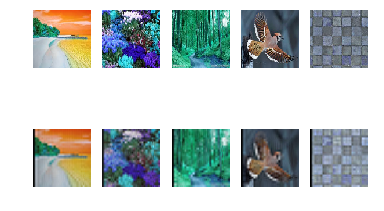

In [21]:
#Z = np.random.random((112,112))
#U = np.random.random((92,92))
num = 1
for i in range(5):
    path = "./data/others/" + str(i+1) + ".jpeg"
    t_0 = cv2.imread(path)
    t_0 = cv2.resize(t_0,(Z.shape[0],U.shape[0]))
    plt.subplot(2,5,num)
    plt.axis("off")
    plt.imshow(t_0)
    t_1 = np.zeros(t_0.shape)
    for i in range(3):
        t_1[:,:,i] = reconstruct_2D(t_0[:,:,i], U, Z, 30)
    plt.subplot(2,5,num+5)
    plt.axis("off")
    plt.imshow(norm_img(t_1))
    num = num + 1
plt.show()

可以看出，上述简单数据集求得的降维矩阵，可以挺好的用于其他的一些图片，说明了降维矩阵具有很强的迁移性。

## 第二部分： 稀疏模型

### 稀疏 PCA

上述的PCA方法是通过将图像数据通过线性变换，映射到其他线性空间。在这样的空间中，会造成图片直观表示的混乱和耦合。例如

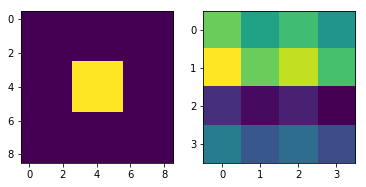

In [35]:
test_matrix = np.ones((3,3))
before_PCA = np.pad(test_matrix,((3,3),(3,3)),'constant',constant_values = (0,0))
right_matrix = np.random.rand(9,4)
left_matrix = np.random.rand(9,4)
after_PCA = left_matrix.T.dot(before_PCA.dot(right_matrix))
plt.title("PCA")
plt.subplot(1,2,1)
plt.imshow(before_PCA)
plt.subplot(1,2,2)
plt.imshow(after_PCA)
plt.show()

可以看出，图像中降维前的阶跃信号在降维后呈现高度耦合，不具备明显的可解释性，不利于降维后的后续分析，这不是我们所需要的。

**对于一张图像，我们希望的主成份分析是达到以下效果:**

<img src="images/6.png" width="50%">

映射过后的稀疏向量更加有利于图像的后续分析工作。

###### 让我们从另一个角度看待这个问题

图像的稀疏表达一般都是基于如下的最小化问题： $$\frac{1}{2}||X-DZ||^2_F + \psi(D) + \phi(Z)$$

其中$X$是我们观测到的数据特征矩阵，$D$是降维矩阵，可以称为“字典”，$Z$是$X$在字典$D$上的描述。$\psi(D),\ \phi(Z)$就是对字典和特征描述的约束。

对于稀疏PCA，就是令$$\psi(Z) = \lambda\sum^n_{i=1}||z_i||_1$$

使得基于字典的描述尽可能的稀疏。

所以Sparse PCA是一个LASSO问题，要求求得的图像描述特征满足以下两个要求：
1. 最小重建误差（最大方差）
2. 描述尽量稀疏

LASSO问题的求解一般基于迭代方法，已经有现成工具包，此处不多做介绍。

###### 结构性稀疏模型

上述的稀疏模型可以求得图像的稀疏描述，可是没有对字典提出要求。我们在分析图像的时候，很希望字典具有可解释性，例如，我们希望模型可以这样描述一张人脸： 一个由两只耳朵，两个眼睛，一个鼻子和一个嘴巴构成的东西。如下图所示：

<img src="images/7.png" width="30%">

这个时候，我们需要对字典施加结构性约束：

## 第三部分：分类

### kernel PCA

kernel PCA是使用核方法对PCA的非线性扩展，即将原数据通过核映射到再生核希尔伯特空间后再使用原本线性的主成分分析。

一般而言，若$N$个数据点在$d<N$维空间中是线性不可分的，但它们在$d >= N$维空间中则是几乎必然线性可分的。

故我们可以使用核方法将数据映射到高维空间。如将$x_i$通过某一函数$\Phi$映射到高维空间中成为$\Phi(x_i)$。

但是，由于我们不知道映射后$\Phi(x_i)$的维度，我们无法再像在线性PCA中那样显式地对协方差进行特征分解（我们不知道主空间的维度，也很难求出主向量）。核PCA方法不直接计算主成分，而是计算数据点在这些主成分上的投影。

关于如何计算数据点在这些主成分上的投影，有一些证明，[这里](https://www.ics.uci.edu/~welling/classnotes/papers_class/Kernel-PCA.pdf)介绍的很详细，下面我只叙述一下算法流程。

$x_i,y_i$为样本数据，
1. 计算$K$矩阵，如$k(\boldsymbol{x_i},\boldsymbol{y_i}) = e^\frac{-||\boldsymbol{x_i} - \boldsymbol{y_i}||^2}{2\sigma^2}$
2. 数据中心化，$K' = K - \mathbf{1_N} K - K \mathbf{1_N} + \mathbf{1_N} K \mathbf{1_N}$
3. 对$K'$进行特征分解，取前k个最大特征值对应的特征向量。

注意：Kernel PCA与之前的PCA方法并不相同。
1. 一般而言，Kernel PCA是用来做分类中的线性不可分的高维数据，所以没有考虑到对于原始数据的保留，也就是说没有考虑到重建。
2. 当样本量较大时，$K$计算量较大。

In [39]:
def calculat_distance(A):
    n = A.shape[0]
    A2 = np.sum(A*A, axis=1, keepdims=True) 
    A_r_2 = np.repeat(A2, n, axis=1)
    A_c_2 = np.repeat(A2.T, n, axis=0)
    dis = A_r_2 + A_c_2 - 2*A.dot(A.T)
    dis[ dis<0 ] = 0
    return np.sqrt(dis)

In [40]:
def get_sigmoid(x):
    x[x <= 0] = float('inf') 
    x = np.min(x, 1)
    sigmoid = 5 * np.mean(x)
    return sigmoid

In [41]:
def norm(x):
    x_min, x_max = x.min(), x.max()
    return (x - x_min)/(x_max - x_min)

In [42]:
def kernel(A, para):
    x = calculat_distance(A)
    if para == 'square':
        f = norm(x*x)
    elif para == 'gauss':
        sigmoid = get_sigmoid(x)
        f = np.exp(- x*x / (2*sigmoid*sigmoid))
    else:
        f = norm(x.dot(x))
    return f

In [43]:
def reduce_mean(x):
    n = x.shape[0]
    a = np.ones(n)/n
    return (x - a*x -x*a + a*x*a)

In [44]:
def norm_eigvector(U):
    row_sum = np.sum(U*U, 0, keepdims=True)
    norm_U = U / np.repeat(row_sum, U.shape[0], 0)
    return norm_U

In [45]:
import sklearn.datasets as ds

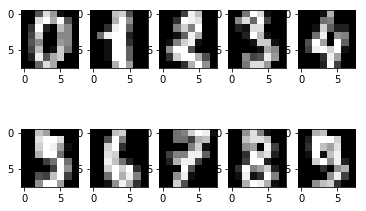

In [46]:
digits = ds.load_digits()
rand_i = np.random.choice(range(digits.data.shape[0]), 100)
D = digits.data[rand_i, :]
labels = digits.target[rand_i]
num = 1
for i in range(10):
    plt.subplot(2,5,num)
    plt.imshow(digits.images[i,:,:], cmap='gray')
    num = num + 1
plt.show()

In [47]:
k = 3
K = kernel(D,'square')
K = reduce_mean(K)
U,_,_ = np.linalg.svd(K)
U = norm_eigvector(U)
Y = K.dot(U[:, 0:k]) 

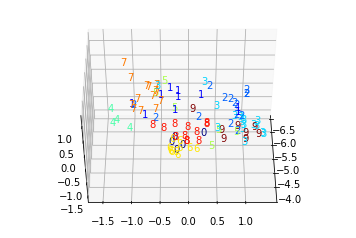

In [49]:
import matplotlib.cm as plt_cm
import matplotlib.colors as plt_col
from mpl_toolkits.mplot3d import Axes3D

def plot_dims(Y, labels):
    l = np.max(Y[:,0]) - np.min(Y[:,0])
    w = np.max(Y[:,1]) - np.min(Y[:,1])
    h = np.max(Y[:,2]) - np.min(Y[:,2])
    fig = plt.figure()
    ax = fig.gca(projection='3d')
    ax.view_init(elev=45, azim=0)
    ax.set_xlim([np.min(Y[:,0]) - 0.1 * l, np.max(Y[:,0]) + 0.1 * l])
    ax.set_ylim([np.min(Y[:,1]) - 0.1 * w, np.max(Y[:,1]) + 0.1 * w])
    ax.set_zlim([np.min(Y[:,2]) - 0.1 * h, np.max(Y[:,2]) + 0.1 * h])
    cmap = plt_cm.jet
    norm = plt_col.Normalize(vmin=0, vmax=9)
    mapper = plt_cm.ScalarMappable(cmap=cmap, norm=norm)
    colors = mapper.to_rgba(range(10))
    for i in range(Y.shape[0]):
        ax.text(Y[i,0], Y[i,1], Y[i,2], labels[i], color=colors[int(labels[i])])
    plt.show()
    return

plot_dims(Y, labels)

## 第四部分：PCA的与其他方法的结合

### 极大似然PCA

作为概率PCA的一种，使用极大似然确定模型参数。

假设$z$的先验分布是均值为零，方差为单位方差的高斯分布。$$p(z) = N(z \ |\ 0,I)$$

观测变量$x$的条件分布也是高斯分布：$$p(x|z) = N(x|Wz + \mu, \sigma^2 I)$$

所以模型一共要估计三个参数：$W,\mu , \sigma$

$$\mu = \bar{x}$$ $$W_{ML} = U_M(L_M - \sigma^2I)^{\frac{1}{2}}R$$ $$\sigma^2_{ML} = \frac{1}{D-M}\sum^D_{i=M=1}\lambda_i$$

## PCANet

上述的PCA仅仅是一个降维过程，在2015年深度学习流行的时候，PCA也有作者推出了PCANet，结构图如下所示：

<img src="images/5.png" width="70%">

PCANet这篇文章算是CNN与PCA的一个很好的结合的例子， [这里是原本的文章](https://arxiv.org/abs/1404.3606)，[这里有中文翻译](https://blog.csdn.net/u013088062/article/details/50039573)

为了不和网络上已有的部分做重复的工作，接下来，我将会简单介绍PCANet的工作原理，然后讨论其代码实现和相关优缺点。

该网络共有两层，两层所进行的操作类似，我们只介绍第一层。

PCANet所不同于一般CNN是由于PCANet中的卷积核是通过PCA方法求取出来的特征向量，而不是CNN中那种迭代自学习产生。那么，如何通过PCA求取卷积核呢？

首先我们需要构建样本矩阵，样本的大小等于卷积核的大小，PCANet文章中是遍历一张

In [ ]:
#TODO

下面是乱七八糟

In [11]:
images_path = './data/plates'
imgs_dir = os.listdir(images_path)
plates = list()
labels = list()
for list_dir in imgs_dir:
    imgs = list()
    temp_path = images_path + '/' + list_dir
    if os.path.isdir(temp_path):
        label_num = int(list_dir)
        imgs_list = os.listdir(temp_path)
        for img_name in imgs_list:
            img_path = temp_path + '/' + img_name
            img = cv2.imread(img_path)
            imgs.append(img)
            labels.append(label_num)
    plates.append(imgs)

In [12]:
img_w = 100
img_h = 100
img_num = len(labels)
X = np.zeros((img_num, img_w, img_h))
num = 0
for plate in plates:
    for img in plate:
        X[num, :,:] = np.mean(cv2.resize(img, (img_w, img_h)), 2)
        num = num + 1
labels = np.array(labels)

In [13]:
k = 20
P = np.zeros((img_num, k*k))
for i in range(img_num):
    temp = np.dot(Z[:,0:k].T ,np.dot(X[i,:,:], U[:,0:k]))
    P[i,:] = np.resize(temp, k*k)

In [14]:
k = 3
K = kernel(P,'gauss')
K = reduce_mean(K)
U,_,_ = np.linalg.svd(K)
U = norm_eigvector(U)
Y = K.dot(U[:, 0:k]) 

In [14]:
import scipy.io as scio
scio.savemat('./data/a.mat', {'X':Y, 'Y':labels})

In [15]:
import random
temp_data = list(zip(Y, labels))
random.shuffle(temp_data)
Y[:,:], labels[:] = zip(*temp_data)

In [16]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
X_train = Y[0:60,:]
y_train = labels[0:60]
X_test = Y[60:,:]
y_test = labels[60:]
clf = KNeighborsClassifier()
clf.fit(X_train, y_train)
predict = clf.predict(X_test)
accuracy = metrics.accuracy_score(y_test, predict)
print 'accuracy: %.2f%%' % (100 * accuracy)

accuracy: 13.33%


### 参考文献

Kernel Principal Components Analysis

Sparse Principal Component Analysis

Structured Sparse Principal Component Analysis

2DPCANet: a deep leaning network for face recognition 

PCANet: A Simple Deep Learning Baseline for Image Classification?

Two-directional two-dimensional PCA for efficient face representation and recognition.pdf

Two-Dimensional PCA:A New Approach to Appearance-Based Face Representation and Recognition

Kernel Principal Component Analysis and its Applications in Face Recognition and Active Shape Models

https://zh.wikipedia.org/wiki/%E6%A0%B8%E4%B8%BB%E6%88%90%E5%88%86%E5%88%86%E6%9E%90

https://zh.wikipedia.org/zh-cn/%E5%B0%8D%E7%A8%B1%E7%9F%A9%E9%99%A3

https://zh.wikipedia.org/zh-cn/%E5%A5%87%E5%BC%82%E5%80%BC%E5%88%86%E8%A7%A3

https://zh.wikipedia.org/zh-cn/%E4%B8%BB%E6%88%90%E5%88%86%E5%88%86%E6%9E%90#cite_note-5

https://blog.csdn.net/w450468524/article/details/54895477

https://blog.csdn.net/jwh_bupt/article/details/12070273

https://blog.csdn.net/u013088062/article/details/49934065

附录：

实对称矩阵有以下的性质：

1. 实对称矩阵A的不同特征值所对应的特征向量是正交的。
2. 实对称矩阵A的特征值都是实数，特征向量都是实向量。
3. n阶实对称矩阵A必可对角化。
4. 可用正交矩阵对角化。
5. K重特征值必有K个线性无关的特征向量，或者说必有秩r(λE-A)=n-k。